# Image_Proccess_Contour

Abstract:


References:
- https://www.kaggle.com/ivalmian/simple-svd-xgboost-baseline-lb-35
- https://www.kaggle.com/arieltci/a-keras-prototype-0-21174-on-pl

## 1. Preprocess

### Import pkgs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.preprocessing import MinMaxScaler, Binarizer
from sklearn.metrics import log_loss, accuracy_score
from IPython.display import display
import skimage
%matplotlib inline

In [2]:
import os
import sys
import time
import zipfile
import lzma
import pickle
from PIL import Image
from shutil import copy2
import cv2
import gc

### Run name

In [3]:
project_name = 'SC_Iceberg_Classifier'
step_name = 'Image_Proccess_Contour'
date_str = time.strftime("%Y%m%d", time.localtime())
time_str = time.strftime("%Y%m%d_%H%M%S", time.localtime())
run_name = project_name + '_' + step_name + '_' + time_str
print('run_name: ' + run_name)
t0 = time.time()

run_name: SC_Iceberg_Classifier_Image_Proccess_Contour_20180105_120056


### Basic folders

In [4]:
cwd = os.getcwd()
input_path = os.path.join(cwd, 'input')
log_path = os.path.join(cwd, 'log')
model_path = os.path.join(cwd, 'model')
output_path = os.path.join(cwd, 'output')
print('input_path: ' + input_path)
print('log_path: ' + log_path)
print('model_path: ' + model_path)
print('output_path: ' + output_path)

input_path: D:\ref\Kaggle\Statoil_C_CORE_Iceberg_Classifier_Challenge\input
log_path: D:\ref\Kaggle\Statoil_C_CORE_Iceberg_Classifier_Challenge\log
model_path: D:\ref\Kaggle\Statoil_C_CORE_Iceberg_Classifier_Challenge\model
output_path: D:\ref\Kaggle\Statoil_C_CORE_Iceberg_Classifier_Challenge\output


### Basic functions

In [5]:
def describe(arr):
    print(arr.shape, arr.min(), arr.max(), sys.getsizeof(arr))

In [6]:
def show_size():
    gc.collect()
    for k in sorted(globals().keys()):
        print('%s\t\t\t %s' % (k, sys.getsizeof(k)))
    return sorted(globals().keys())
# s0 = show_size()
# print(type(s0))

### Unzip files

In [7]:
# with lzma.open("train.json.7z") as f:
#     file_content = f.read()

In [8]:
# Unzip(input_path, os.path.join(input_path, 'sample_submission.csv.7z'))
# Unzip(input_path, os.path.join(input_path, 'test.json.7z'))
# Unzip(input_path, os.path.join(input_path, 'train.json.7z'))

### Load data

In [9]:
sample_submission_path = os.path.join(input_path, 'sample_submission.csv')
sample_submission = pd.read_csv(sample_submission_path)
print(sample_submission.shape)
sample_submission.head(2)
del sample_submission

(8424, 2)


In [10]:
%%time
#Load data
data_path = os.path.join(input_path, 'train.json')
test_path = os.path.join(input_path, 'test.json')
pd_data = pd.read_json(data_path)
pd_test = pd.read_json(test_path)
print(pd_data.shape)
print(pd_test.shape)

(1604, 5)
(8424, 4)
Wall time: 14.1 s


In [11]:
print(pd_data['id'].values.shape)
print(pd_data['band_1'].values.shape)
print(pd_data['band_2'].values.shape)
print(pd_data['inc_angle'].values.shape)
print(pd_data['is_iceberg'].values.shape)
print('-'*80)
print(pd_test['id'].values.shape)
print(pd_test['band_1'].values.shape)
print(pd_test['band_2'].values.shape)
print(pd_test['inc_angle'].values.shape)
# print(pd_test['is_iceberg'].values.shape)

(1604,)
(1604,)
(1604,)
(1604,)
(1604,)
--------------------------------------------------------------------------------
(8424,)
(8424,)
(8424,)
(8424,)


In [12]:
is_iceberg = pd_data['is_iceberg']
describe(is_iceberg)

is_iceberg_path = os.path.join(input_path, 'is_iceberg.p')

pickle.dump(is_iceberg, open(is_iceberg_path, 'wb'))

(1604,) 0 1 12936


In [13]:
id_data = pd_data['id'].as_matrix()
id_test = pd_test['id'].as_matrix()
describe(id_data)
describe(id_test)

id_data_path = os.path.join(input_path, 'id_data.p')
id_test_path = os.path.join(input_path, 'id_test.p')

pickle.dump(id_data, open(id_data_path, 'wb'))
pickle.dump(id_test, open(id_test_path, 'wb'))

# del id_data
# del id_test

(1604,) 000d71b1 fffe76e4 96
(8424,) 000c65d7 fff77564 96


In [14]:
y_data = pd_data['is_iceberg']
describe(y_data)

(1604,) 0 1 12936


In [15]:
# s1 = show_size()
# cmp_s10 = [ s for s in s1 if s not in s0]
# print(cmp_s10)

In [16]:
# gc.collect()
# s1 = show_size()
# cmp_s10 = [ s for s in s1 if s not in s0]
# print(cmp_s10)

In [17]:
inc_angle_data = pd_data['inc_angle'].replace('na', 0).astype(float).fillna(0.0)
inc_angle_test = pd_test['inc_angle'].replace('na', 0).astype(float).fillna(0.0)
describe(inc_angle_data)
describe(inc_angle_test)

inc_angle_data_path = os.path.join(input_path, 'inc_angle_data.p')
inc_angle_test_path = os.path.join(input_path, 'inc_angle_test.p')

pickle.dump(inc_angle_data, open(inc_angle_data_path, 'wb'))
pickle.dump(inc_angle_test, open(inc_angle_test_path, 'wb'))

del inc_angle_data
del inc_angle_test

(1604,) 0.0 45.9375 12936
(8424,) 23.0805 50.66178518 67496


In [18]:
#get numpy arrays for train/test data, prob there is a more pythonic approach
band1 = pd_data['band_1'].values
im1 = np.zeros((len(band1),len(band1[0])))
for j in range(len(band1)):
    im1[j,:]=np.asarray(band1[j])
    
band2 = pd_data['band_2'].values
im2 = np.zeros((len(band2),len(band2[0])))
for j in range(len(band2)):
    im2[j,:]=np.asarray(band2[j])

#get numpy array for test data
band1test = pd_test['band_1'].values
im1test = np.zeros((len(band1test),len(band1test[0])))
for j in range(len(band1test)):
    im1test[j,:]=np.asarray(band1test[j])
    
band2test = pd_test['band_2'].values
im2test = np.zeros((len(band2test),len(band2test[0])))
for j in range(len(band2test)):
    im2test[j,:]=np.asarray(band2test[j])

In [19]:
%%time
band1_data = im1.reshape(-1, 75,75)
band2_data = im2.reshape(-1, 75,75)

band1_test = im1test.reshape(-1, 75,75)
band2_test = im2test.reshape(-1, 75,75)

describe(band1_data)
describe(band2_data)
describe(band1_test)
describe(band2_test)

band1_data_path = os.path.join(input_path, 'band1_data.p')
band2_data_path = os.path.join(input_path, 'band2_data.p')
band1_test_path = os.path.join(input_path, 'band1_test.p')
band2_test_path = os.path.join(input_path, 'band2_test.p')

pickle.dump(band1_data, open(band1_data_path, 'wb'))
pickle.dump(band2_data, open(band2_data_path, 'wb'))
pickle.dump(band1_test, open(band1_test_path, 'wb'))
pickle.dump(band2_test, open(band2_test_path, 'wb'))

# x_data = pickle.load(open(band1_data_path, mode='rb'))

(1604, 75, 75) -45.594448 34.574917 128
(1604, 75, 75) -45.655499 20.154249 128
(8424, 75, 75) -45.6805458069 37.090523 128
(8424, 75, 75) -49.0835 37.0905227661 128
Wall time: 5.48 s


In [20]:
del band1
del band2
del band1test
del band2test

del im1
del im2
del im1test
del im2test

del pd_data
del pd_test
gc.collect()

31

In [21]:
# globals()

Convert to gray, value range should be [0, 1]

In [22]:
def convert2gray(datas):
    datas_gray = np.zeros(datas.shape)
    for i, value in enumerate(datas):
        temp = datas[i,:,:]
        t_max = temp.max()
        t_min = temp.min()
        datas_gray[i,:,:] = (temp - t_min)/(t_max - t_min)
    return datas_gray

band1_data_gray = convert2gray(band1_data)
band2_data_gray = convert2gray(band2_data)
band1_test_gray = convert2gray(band1_test)
band2_test_gray = convert2gray(band2_test)

# del band1_data
# del band2_data
# del band1_test
# del band2_test

describe(band1_data_gray)
describe(band2_data_gray)
describe(band1_test_gray)
describe(band2_test_gray)

# print(band1_data_gray.min())
# print(band1_data_gray.max())
# print(band2_data_gray.min())
# print(band2_data_gray.max())
# print(band1_test_gray.min())
# print(band1_test_gray.max())
# print(band2_test_gray.min())
# print(band2_test_gray.max())

(1604, 75, 75) 0.0 1.0 72180128
(1604, 75, 75) 0.0 1.0 72180128
(8424, 75, 75) 0.0 1.0 379080128
(8424, 75, 75) 0.0 1.0 379080128


In [23]:
# band_avg_data = (band1_data + band2_data)/2
# print(band_avg_data.shape)
# band_avg_test = (band1_test + band2_test)/2
# print(band_avg_test.shape)

# band_avg_data_path = os.path.join(input_path, 'band_avg_data.p')
# band_avg_test_path = os.path.join(input_path, 'band_avg_test.p')

# pickle.dump(band_avg_data, open(band_avg_data_path, 'wb'))
# pickle.dump(band_avg_test, open(band_avg_test_path, 'wb'))

1. The next two figure show that, converting ot gray do not change the image view.
2. At the test data set, we can see some image repeat.
3. Some channel of radar may be error which all noise.

(6, 4)
Wall time: 1.61 s


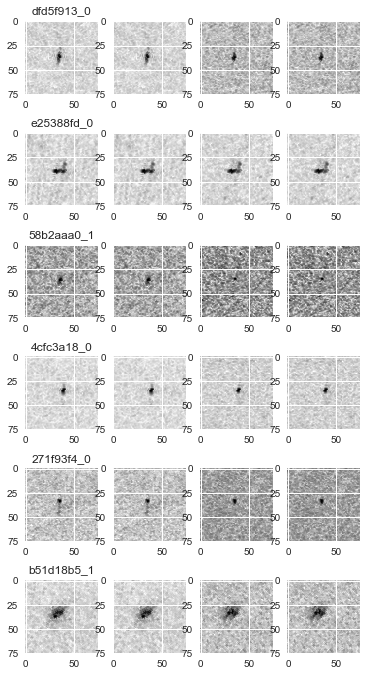

In [24]:
%%time
def show_data_images(rows, fig_column, id_data, y_data, *args):
    columns = len(args)
    figs, axes = plt.subplots(rows, columns, figsize=(rows, fig_column*columns))
    print(axes.shape)
    for i, ax in enumerate(axes):
        ax[0].set_title(id_data[i] + '_' + str(y_data[i]))
        for j, arg in enumerate(args):
            ax[j].imshow(arg[i])

show_data_images(6, 3, id_data, y_data, band1_data, band1_data_gray, band2_data, band2_data_gray)

(6, 4)
Wall time: 1.39 s


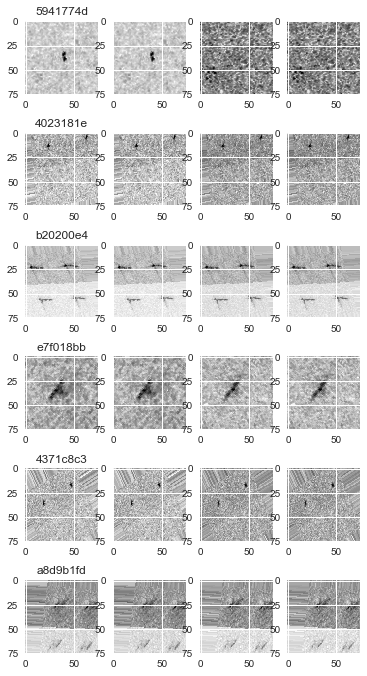

In [25]:
%%time
def show_test_images(rows, fig_column, id_data, *args):
    columns = len(args)
    figs, axes = plt.subplots(rows, columns, figsize=(rows, fig_column*columns))
    print(axes.shape)
    for i, ax in enumerate(axes):
        ax[0].set_title(id_data[i])
        for j, arg in enumerate(args):
            ax[j].imshow(arg[i])

show_test_images(6, 3, id_test, band1_test, band1_test_gray, band2_test, band2_test_gray)

In [26]:
band1_data_gray_path = os.path.join(input_path, 'band1_data_gray.p')
band2_data_gray_path = os.path.join(input_path, 'band2_data_gray.p')
band1_test_gray_path = os.path.join(input_path, 'band1_test_gray.p')
band2_test_gray_path = os.path.join(input_path, 'band2_test_gray.p')

pickle.dump(band1_data_gray, open(band1_data_gray_path, 'wb'))
pickle.dump(band2_data_gray, open(band2_data_gray_path, 'wb'))
pickle.dump(band1_test_gray, open(band1_test_gray_path, 'wb'))
pickle.dump(band2_test_gray, open(band2_test_gray_path, 'wb'))

x_data = pickle.load(open(band1_data_gray_path, mode='rb'))

In [27]:
from skimage import transform,data

def resize_image(arr, size=200):
    new_arr = np.zeros((arr.shape[0], size, size))
    for i, img in enumerate(arr):
        new_arr[i] = transform.resize(img, (size, size), mode='reflect')
    return new_arr
# test
aa = np.ones((3, 75, 75))
bb = resize_image(aa)
print(bb.shape)

(3, 200, 200)


In [28]:
# %%time
# band1_data_gray200 = resize_image(band1_data_gray)
# band2_data_gray200 = resize_image(band2_data_gray)
# band1_test_gray200 = resize_image(band1_test_gray)
# band2_test_gray200 = resize_image(band1_test_gray)

# print(band1_data_gray200.shape)
# print(band2_data_gray200.shape)
# print(band1_test_gray200.shape)
# print(band2_test_gray200.shape)

In [29]:
# x_data = pickle.load(open(band1_data_gray_path, mode='rb'))

In [30]:
# show_data_images(6, 3, id_data, y_data, band1_data_gray, band1_data_gray200, band2_data_gray, band2_data_gray200)

In [31]:
# show_test_images(6, 3, id_test, band1_test_gray, band1_test_gray200, band2_test_gray, band2_test_gray200)

### 主要思路：缩小无关区域范围

1. 使用阈值0.9二值化
2. 然后求中心点坐标，得到种子点（或叫中心点）
3. 然后，根据种子点生长出一个或几个区域
4. 选择一个区域
    - 计算各个种子点之间的距离，如果距离较近，则视为是一个整体，合并种子点。较近的判断使用，点与点之间的距离除以全画幅宽（方形的图，长宽相等），选择一个比例，比如0.2
    - 选择其中之一，有合并种子点的情况，优先选合并过的种子点。然后，优先选择面积更大。然后，优先选择x,y到图片中心更近的点。前面提到的这3个条件给一个权重，求综合权重值。综合权重值一样，则直接选综合权重值相同的第一个种子点（也可以随机选择一个）。这里主要针对有的图像中，有重影的情况。其他情况，并没有考虑那么多。
5. 然后做矩形框，这样识别出目标的大致区域。矩形框的四个顶点（x0, x1, y0, y1），分别就是种子点集中最大最小的x, y值。
6. 然后，取矩形框2倍距离的面积，截取灰度图片（注意这里的目的是要截取灰度图片，而不是二值化的图片）。这里面积扩张有可能会碰到边框。碰到边框时，抵满边框，向相反的方向扩展以满足2倍面积。
7. 最后统一调整图片大小到75*75


上面的这个搜索算法需要改进，比如：
- 从左到右，从上到下搜索像素点，从碰到的第一个亮点开始，把距离小于5个像素点的点都合并到同一个点集。以这种方式区域生长。

以上表明：有这样的一个能力：具备图像识别领域的基础知识，具体问题中，能提出一个想法，然后，我去尝试实现，最后验证效果。

以上操作，步骤那么多，感觉很有可能最后一点用的都没有，就像泰坦尼克的stacking操作一样，就只能呵呵了。

1. Convert to binary image with 0.95 threshhold

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
(1604, 75, 75)
(1604, 75, 75)
(6, 4)


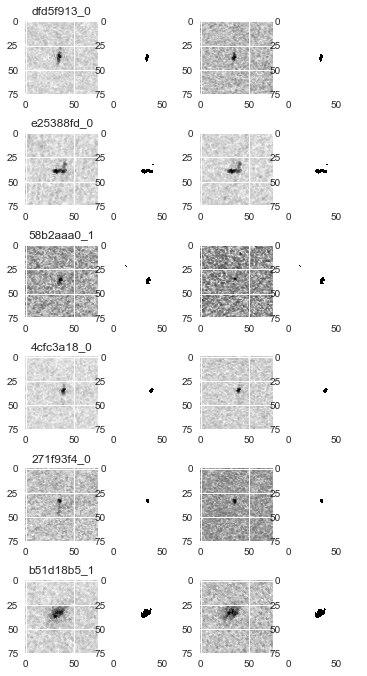

In [32]:
band1_data_bin9 = (band1_data_gray > 0.7).astype(np.uint8)
band2_data_bin9 = (band1_data_gray > 0.7).astype(np.uint8)
print(band1_data_bin9[0]) # confirm the hot spot is 1, others should be 0
print(band1_data_bin9.shape) # confirm the numpy shape
print(band2_data_bin9.shape)
show_data_images(6, 3, id_data, y_data, band1_data_gray, band1_data_bin9, band2_data_gray, band2_data_bin9)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
0
255
(8424, 75, 75)
(1604, 75, 75)
(10, 8)


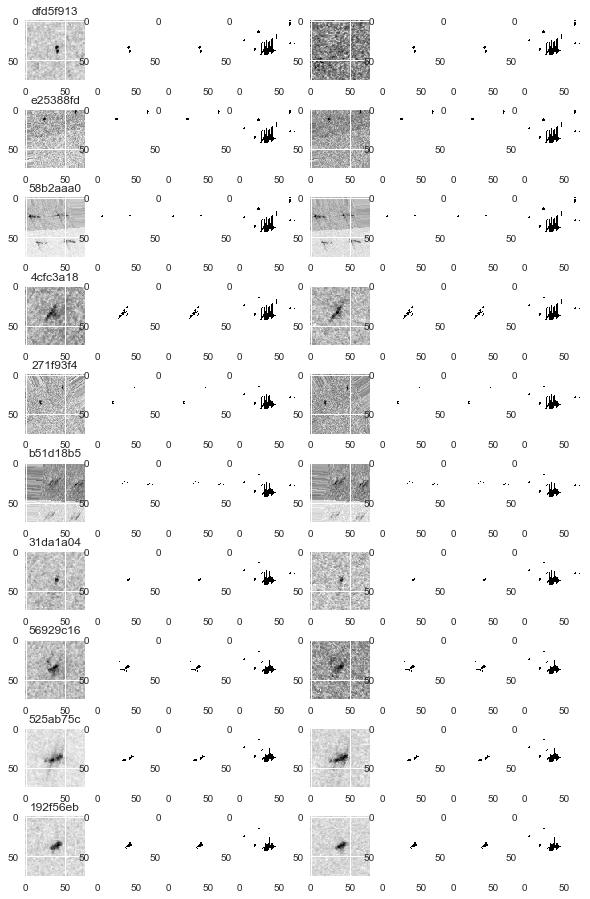

In [33]:
threshhold = 0.8
band1_test_bin9 = (band1_test_gray > threshhold).astype(np.uint8)*255
band2_test_bin9 = (band1_test_gray > threshhold).astype(np.uint8)*255
# _, band1_test_bin9 = cv2.threshold((band1_test_gray*255).astype(np.uint8), int(255*0.7), 255, cv2.THRESH_BINARY)
# m1 = cv2.morphologyEx(band1_test_bin9, cv2.MORPH_OPEN, np.ones((2, 2)))
band1_test_open = cv2.morphologyEx(band1_test_bin9, cv2.MORPH_CLOSE, np.ones((1, 1)))
band2_test_open = cv2.morphologyEx(band2_test_bin9, cv2.MORPH_CLOSE, np.ones((1, 1)))
band1_test_close = cv2.morphologyEx(band1_test_open, cv2.MORPH_CLOSE, np.ones((20, 10)))
band2_test_close = cv2.morphologyEx(band2_test_open, cv2.MORPH_CLOSE, np.ones((20, 10)))
# plt.figure(figsize=(16, 9))
# plt.subplot(2, 1, 1)
# plt.imshow(band1_test_bin9[3])
# plt.subplot(2, 1, 2)
# plt.imshow(m1[3])
# # plt.subplot(4, 3, 3)
# # plt.imshow(m2[2])

print(band1_test_bin9[0]) # confirm the hot spot is 1, others should be 0
print(band1_test_bin9.min())
print(band1_test_bin9.max())
print(band1_test_bin9.shape) # confirm the numpy shape
print(band2_data_bin9.shape)
show_test_images(10, 2, id_data, band1_test_gray, band1_test_bin9, band1_test_open, band1_test_close, band2_test_gray, band2_test_bin9, band2_test_open, band2_test_close)

In [34]:
band1_data_center = band1_data_gray[:, 18:57, 18:57]
band2_data_center = band2_data_gray[:, 18:57, 18:57]
band1_test_center = band1_test_gray[:, 18:57, 18:57]
band2_test_center = band2_test_gray[:, 18:57, 18:57]

band1_data_center_path = os.path.join(input_path, 'band1_data_center.p')
band2_data_center_path = os.path.join(input_path, 'band2_data_center.p')
band1_test_center_path = os.path.join(input_path, 'band1_test_center.p')
band2_test_center_path = os.path.join(input_path, 'band2_test_center.p')

pickle.dump(band1_data_center, open(band1_data_center_path, 'wb'))
pickle.dump(band2_data_center, open(band2_data_center_path, 'wb'))
pickle.dump(band1_test_center, open(band1_test_center_path, 'wb'))
pickle.dump(band2_test_center, open(band2_test_center_path, 'wb'))

x_data = pickle.load(open(band1_data_gray_path, mode='rb'))

In [35]:
# gray = cv2.threshold(band1_test_gray[3].astype(np.uint8), 0.9, 1, cv2.THRESH_BINARY)
# # plt.imshow(gray[1])
# img2, ctrs, hier = cv2.findContours(gray[1], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# print((img2, ctrs, hier))
# plt.imshow(img2)
# # plt.imshow(ctrs, cmap='gray')

In [36]:
# import cv2
# print(band1_test_bin9[0].max())
# rgb = cv2.merge((band1_test_bin9[0], band1_test_bin9[0], band1_test_bin9[0]))
# print(rgb.shape)
# plt.imshow(rgb)
# # gray = cv2.cvtColor(band1_test_bin9[0], cv2.COLOR_BGR2GRAY)
# # image = cv2.imread(band1_test_bin9[0], cv2.CV_LOAD_IMAGE_GRAYSCALE)

0.380859375


C:\Users\ligl\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log2
  


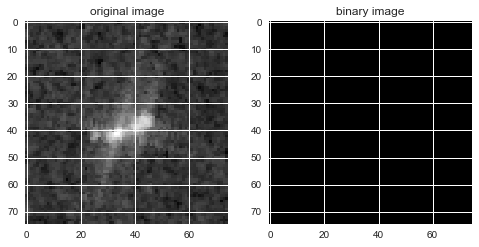

In [37]:
from skimage import data, filters
import matplotlib.pyplot as plt
index = 8
image = band1_test_gray[index]
# image = band1_data_edges[index]
thresh = filters.threshold_otsu(image)   #返回一个阈值
print(thresh)
dst =np.log2(image)*1.0   #根据阈值进行分割
dst = (dst > 0.05).astype(int)

plt.figure('thresh',figsize=(8,8))

plt.subplot(121)
plt.title('original image')
plt.imshow(image,plt.cm.gray)

plt.subplot(122)
plt.title('binary image')
plt.imshow(dst,plt.cm.gray)

plt.show()

In [38]:
t1 = time.time()
print('time cost: %.2f s' % (t1-t0))
print(run_name)
print('Done!')

time cost: 46.51 s
SC_Iceberg_Classifier_Image_Proccess_Contour_20180105_120056
Done!
